In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np
import pandas as pd
import ast
import glob
import functools

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import project as project
importlib.reload(project);

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
data_dir = '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/sieci/'
csv_files = glob.glob(data_dir + "Higgs*.csv")

In [3]:
dfs = []

for file in csv_files:
    df = pd.read_csv(file)

    for col in ['tau.pt', 'tau.eta', 'tau.phi', 'H.pt', 'H.eta', 'H.phi']:
        df[col] = df[col].apply(ast.literal_eval)

    
    df['tau1_pt'] = df['tau.pt'].apply(lambda x: x[0])
    df['tau2_pt'] = df['tau.pt'].apply(lambda x: x[1])
    df['tau1_eta'] = df['tau.eta'].apply(lambda x: x[0])
    df['tau2_eta'] = df['tau.eta'].apply(lambda x: x[1])
    df['tau1_phi'] = df['tau.phi'].apply(lambda x: x[0])
    df['tau2_phi'] = df['tau.phi'].apply(lambda x: x[1])
    df['H_pt'] = df['H.pt'].apply(lambda x: x[0])
    df['H_eta'] = df['H.eta'].apply(lambda x: x[0])
    df['H_phi'] = df['H.phi'].apply(lambda x: x[0])

    df.drop(columns=['tau.pt', 'tau.eta', 'tau.phi', 'H.pt', 'H.eta', 'H.phi'], inplace=True)

    dfs.append(df)

In [4]:
df = pd.concat(dfs, ignore_index=True)
df.head()

,H.m,H.E,t1.m,t1.E,t2.m,t2.E,METx,METy,trueMETx,trueMETy,...,type2,tau1_pt,tau2_pt,tau1_eta,tau2_eta,tau1_phi,tau2_phi,H_pt,H_eta,H_phi
0,196.73200,282.94920,1.77682,184.299360,1.77682,98.64985,-50.879560,-7.675525,-52.073196,-13.297127,...,-1,76.953780,98.63361,1.519704,-0.002149,-2.765061,1.797632,115.700005,1.164141,2.515362
1,170.96394,454.64020,1.77682,127.403140,1.77682,327.23706,236.432200,-97.585000,246.659970,-110.700200,...,-1,124.511536,228.12059,0.214641,0.901347,-0.984634,-0.233547,330.250270,0.726369,-0.493766
2,403.04907,770.57380,1.77682,453.754670,1.77682,316.81910,18.701082,-1.000554,14.325636,21.218117,...,-1,90.911680,252.49693,-2.290618,-0.699414,-2.556309,0.778071,164.195970,-2.063401,0.884353
3,218.99274,233.65942,1.77682,108.677956,1.77682,124.98147,-43.222538,-18.162619,-33.788174,-6.049116,...,-1,102.301540,117.20386,-0.350866,-0.362030,0.301128,-2.878016,15.459115,-2.346176,-3.129083
4,234.15674,251.93723,1.77682,99.779755,1.77682,152.15747,104.295290,-8.689900,90.916330,-2.842107,...,-1,76.937290,137.41629,0.752438,-0.458990,2.402238,-0.038647,92.950200,-0.019375,0.524304


In [5]:
print(colored("Columns in the dataset:\n", 'green'), df.columns.values)
print(colored("Shape of the dataset:\n", 'red'), df.shape)

Columns in the dataset:
 ['H.m' 'H.E' 't1.m' 't1.E' 't2.m' 't2.E' 'METx' 'METy' 'trueMETx'
 'trueMETy' 'dm1' 'pt1' 'eta1' 'phi1' 'mass1' 'type1' 'dm2' 'pt2' 'eta2'
 'phi2' 'mass2' 'type2' 'tau1_pt' 'tau2_pt' 'tau1_eta' 'tau2_eta'
 'tau1_phi' 'tau2_phi' 'H_pt' 'H_eta' 'H_phi']
Shape of the dataset:
 (35586, 31)


In [6]:
input_features = [
    'dm1', 'pt1', 'eta1', 'phi1', 'mass1',
    'dm2', 'pt2', 'eta2', 'phi2', 'mass2',
    'trueMETx', 'trueMETy'
]

output_targets = [
    'H.m', 'H_pt', 'H_eta', 'H_phi',
    't1.m', 'tau1_pt', 'tau1_eta', 'tau1_phi',
    't2.m', 'tau2_pt', 'tau2_eta', 'tau2_phi'
]


output_targets = ['H.m', 'H_pt','tau1_pt','tau2_pt']


output_targets = ['H.m', 'H_pt']

In [7]:
features = df[input_features].astype('float32').values
labels = df[output_targets].astype('float32').values

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

print(colored("Dataset:\n", 'blue'), dataset)
print(colored("Dataset length:\n", 'green'), len(features))

Dataset:
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(12,), dtype=tf.float32, name=None), TensorSpec(shape=(2,), dtype=tf.float32, name=None))>
Dataset length:
 35586


I0000 00:00:1749552909.328000 16816651 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1749552909.328020 16816651 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
nStepsPerEpoch = project.nStepsPerEpoch
batchSize = project.batchSize
output_shape = len(output_targets)
buffor_size = project.buffor_size

minval = 5.0
maxval = 55.0
mean = 0.0
stddev = 1.0
rho_min = -1.0
rho_max = 1.0

adding_smeard_MET = functools.partial(project.add_smeared_MET, minval=minval, maxval=maxval, mean=mean, stddev=stddev, rho_min=rho_min, rho_max=rho_max)

dataset_train_preaper = dataset.batch(batchSize).map(adding_smeard_MET).take(nStepsPerEpoch).cache()

item = next(iter(dataset_train_preaper))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (64, 17)
Labels shape: (64, 2)


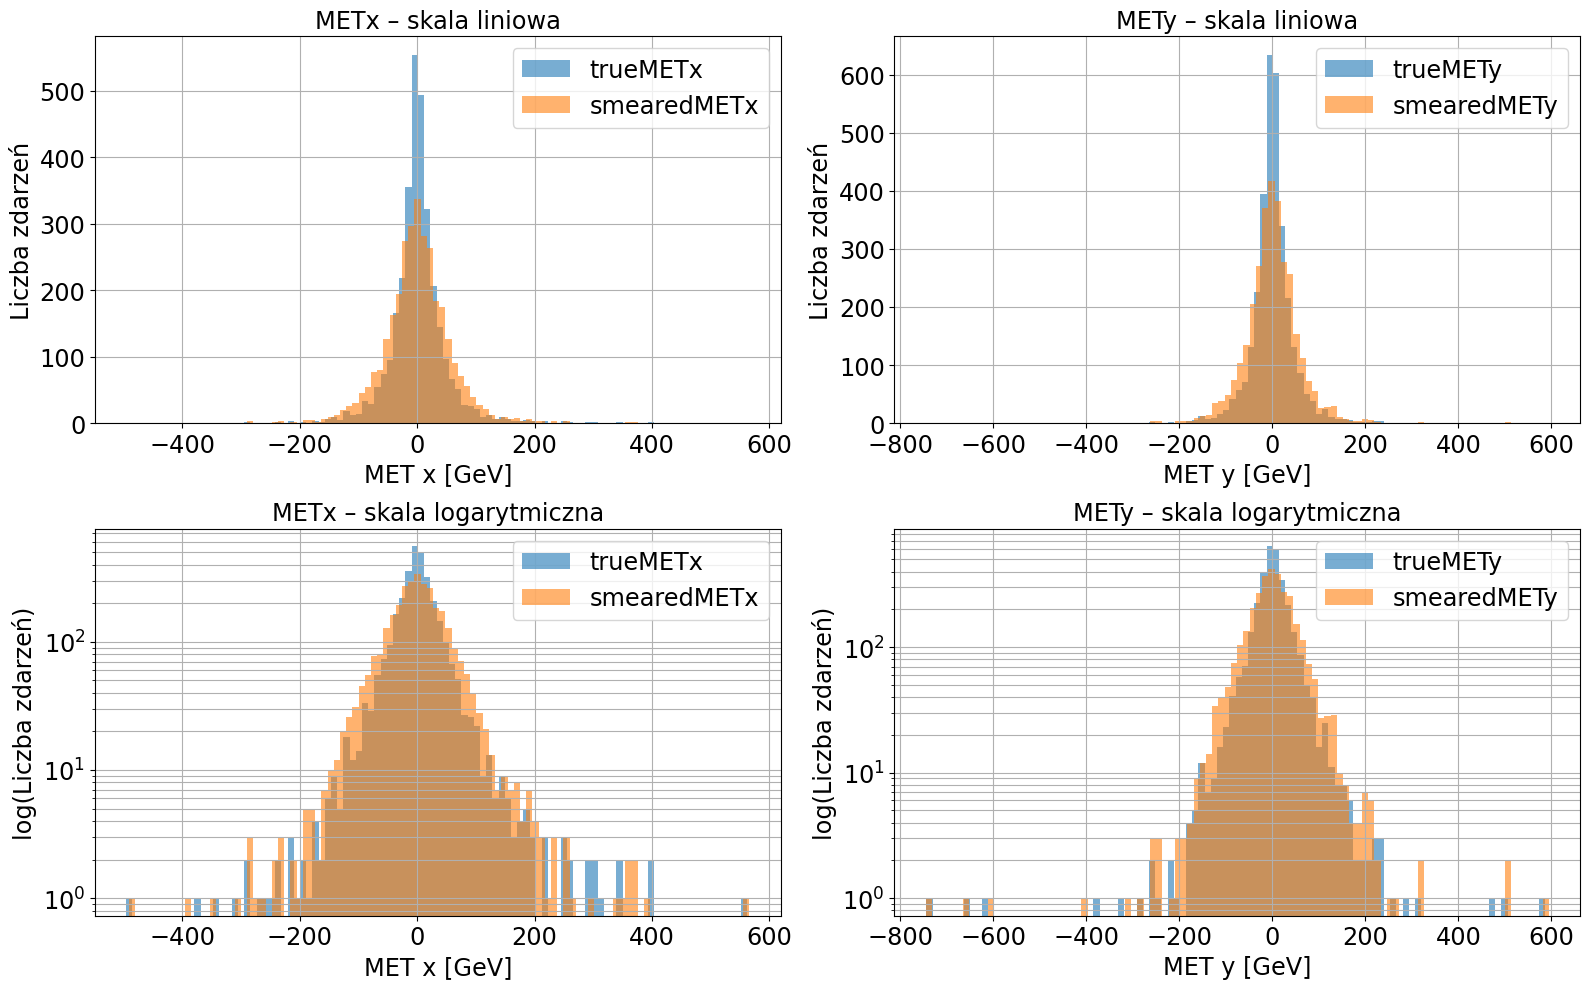

In [10]:
project.plot_MET(dataset_train_preaper)

In [11]:
dataset_train = dataset_train_preaper.map(project.remove_true_MET).cache()

item = next(iter(dataset_train))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (64, 15)
Labels shape: (64, 2)


## Model FCNN

In [12]:
model_fc = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(15,), name="model_input"),
    
    tf.keras.layers.Normalization(),
    
    tf.keras.layers.Dense(64, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),

    tf.keras.layers.Dense(128, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),

    tf.keras.layers.Dense(256, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(512, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(128, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(64, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(32, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),

    tf.keras.layers.Dense(output_shape, activation='relu', name="output") 
], name="FC_regression_model")

model_fc.summary()

Model: "FC_regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,049 (976.76 KB)

 Trainable params: 250,018 (976.63 KB)

 Non-trainable params: 31 (128.00 B)

Epoch 1/300


E0000 00:00:1749552911.288870 16816651 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


428/428 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9154 - loss: 452.7701 - val_accuracy: 0.9303 - val_loss: 255.4189
Epoch 2/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9230 - loss: 256.8314 - val_accuracy: 0.9293 - val_loss: 238.6407
Epoch 3/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9217 - loss: 243.0726 - val_accuracy: 0.9313 - val_loss: 232.2327
Epoch 4/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9233 - loss: 238.5056 - val_accuracy: 0.9313 - val_loss: 229.5188
Epoch 5/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9239 - loss: 234.6233 - val_accuracy: 0.9279 - val_loss: 228.7777
Epoch 6/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9223 - loss: 231.8440 - val_accuracy: 0.9326 - val_loss: 225.6910
Epoch 7/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9228 - loss: 229.1335 - val_accuracy: 0.9301 - val_loss: 224.6858
Epoch 8/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9228 -

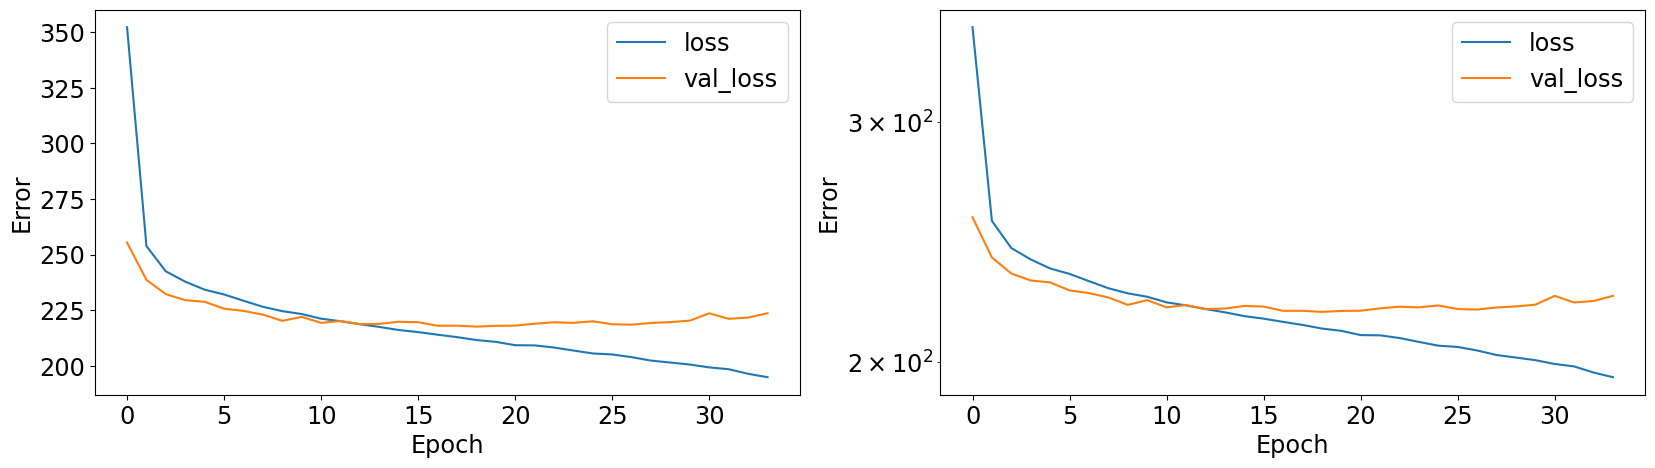

In [13]:
total_dataset = dataset_train.shuffle(buffor_size).cache()
val_batches = total_dataset.take(128)
train_batches = total_dataset.skip(128)

importlib.reload(project);

model_fc = project.trainModel(model_fc, train_data=train_batches, val_data=val_batches, nEpochs=300)

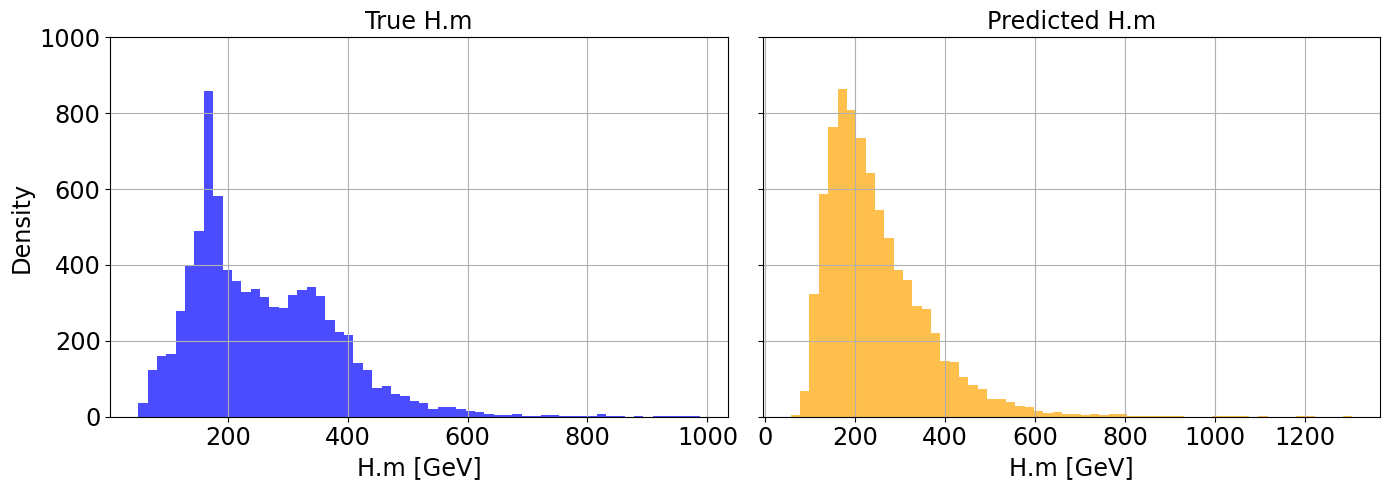

In [14]:
project.plot_H_mass(model_fc, val_batches)

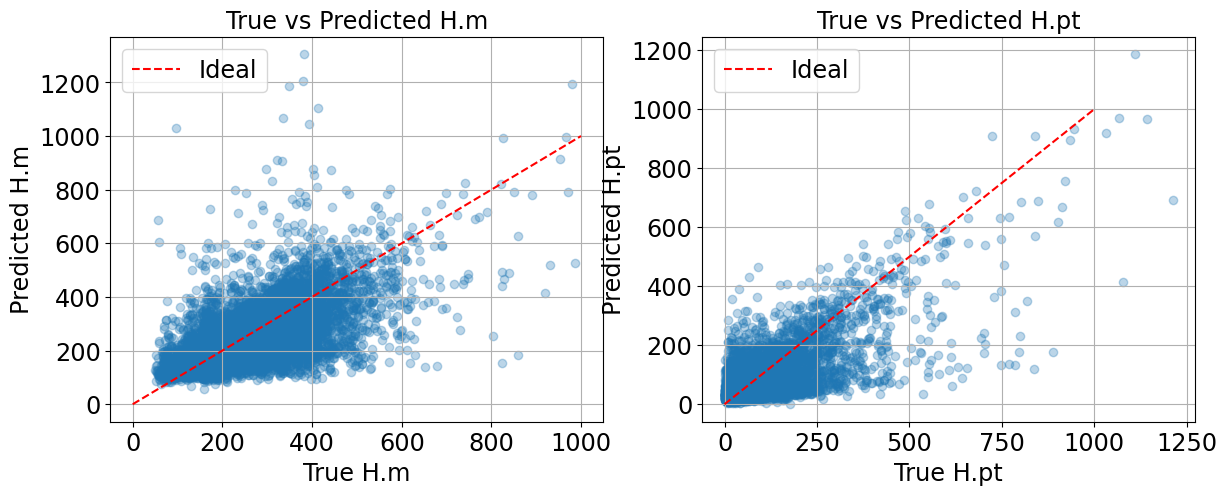

In [15]:
project.true_vs_predict_H_mass(model_fc, val_batches)

Plotting histograms for outputs:  [342.12888, 352.30948, 183.28392, 162.7601, 193.6552, 239.37825, 287.56808, 159.94656, 247.27509, 162.17303, 192.24739, 164.62181, 157.12726, 156.16283, 340.22415, 182.4623, 143.74052, 174.54324, 219.69946, 154.30856, 266.21704, 148.37492, 158.61755, 158.32487, 159.35382, 182.46318, 176.3606, 182.43924, 538.56104, 153.5105, 155.99112, 198.97404, 182.47351, 161.86682, 161.17969, 188.53862, 157.64873, 202.1959, 370.4416, 158.7038, 155.10117, 393.09894, 151.60483, 165.5605, 187.9472, 151.09782, 232.05434, 172.74364, 406.9623, 229.47508, 152.07637, 182.82617, 148.26445, 157.60696, 159.02275, 356.2088, 158.4829, 298.11057, 162.82507, 211.58376, 163.49223, 174.89214, 157.5145, 168.42815, 279.0258, 283.1841, 329.58408, 648.57837, 414.70105, 419.81168, 358.08563, 411.78204, 387.805, 347.21426, 488.04813, 302.76135, 369.76288, 362.59396, 526.6638, 328.70773, 233.47354, 392.28412, 291.62146, 368.60757, 235.84213, 358.44604, 345.70914, 323.291, 487.1671, 287.1362

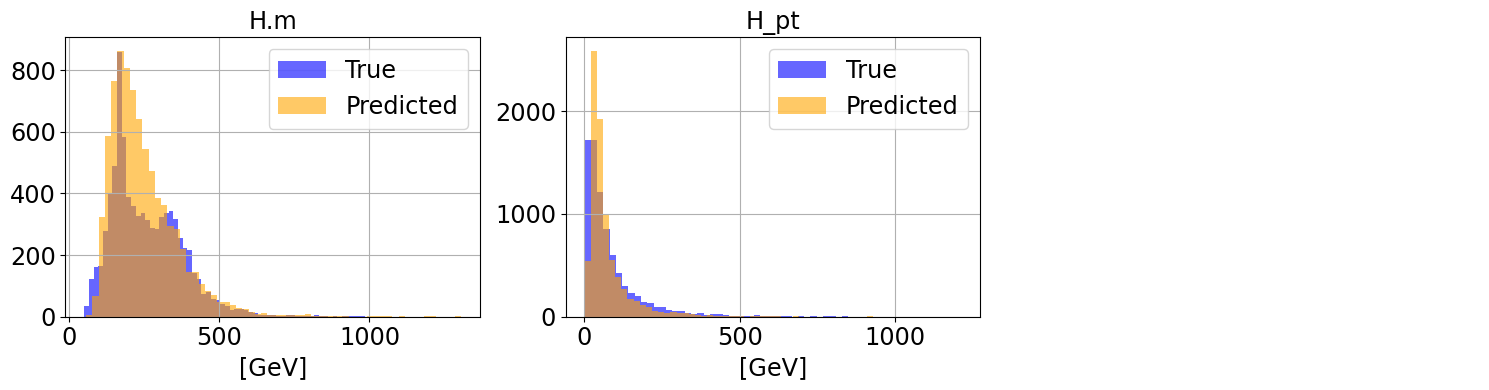

In [16]:
project.plot_all_labels(model_fc, val_batches, output_targets)

## Model architektury dwugałęziowej

In [17]:
dataset_train_test = dataset_train.unbatch()
dataset_split = dataset_train_test.map(project.split_inputs).batch(batchSize).cache()

total_dataset = dataset_split.shuffle(buffor_size).cache()
val_batches = total_dataset.take(128)
train_batches = total_dataset.skip(128)

In [18]:
input_particles = tf.keras.Input(shape=(10,), name="particles_input")
input_met = tf.keras.Input(shape=(5,), name="met_input")

# Gałąź cząstek
norm_particles = tf.keras.layers.Normalization()(input_particles)
x1 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_particles)
x1 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)
x1 = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)

# Gałąź MET
norm_met = tf.keras.layers.Normalization()(input_met)
x2 = tf.keras.layers.Dense(32, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_met)
x2 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)
x2 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)

# Połączenie
x = tf.keras.layers.concatenate([x1, x2])
x = tf.keras.layers.Dense(512, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
output = tf.keras.layers.Dense(output_shape, activation='linear', name='output')(x)

model_dual = tf.keras.Model(inputs={'particles_input': input_particles, 'met_input': input_met}, outputs=output)

model_dual.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ particles_input     │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ met_input           │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 10)        │         21 │ particles_input[… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 5)         │         11 │ met_input[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │        704 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │        192 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │      8,320 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │      2,112 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │     33,024 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │      8,320 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ dense_9[0][0],    │
│ (Concatenate)       │                   │            │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 512)       │    197,120 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 256)       │    131,328 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 128)       │     32,896 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │      8,256 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 2)         │        130 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 422,434 (1.61 MB)

 Trainable params: 422,402 (1.61 MB)

 Non-trainable params: 32 (136.00 B)

Epoch 1/300


E0000 00:00:1749553151.593804 16816651 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


    427/Unknown 21s 43ms/step - accuracy: 0.8794 - loss: 371.0670

/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


428/428 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8795 - loss: 370.6623 - val_accuracy: 0.9343 - val_loss: 270.4868
Epoch 2/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9230 - loss: 248.1408 - val_accuracy: 0.9336 - val_loss: 250.8068
Epoch 3/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9234 - loss: 236.7958 - val_accuracy: 0.9318 - val_loss: 239.4182
Epoch 4/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9238 - loss: 227.4019 - val_accuracy: 0.9349 - val_loss: 228.8202
Epoch 5/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9251 - loss: 221.2116 - val_accuracy: 0.9325 - val_loss: 225.6138
Epoch 6/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9249 - loss: 218.8553 - val_accuracy: 0.9315 - val_loss: 224.6036
Epoch 7/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9250 - loss: 216.6444 - val_accuracy: 0.9333 - val_loss: 224.4266
Epoch 8/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 190s 445ms/step - accuracy

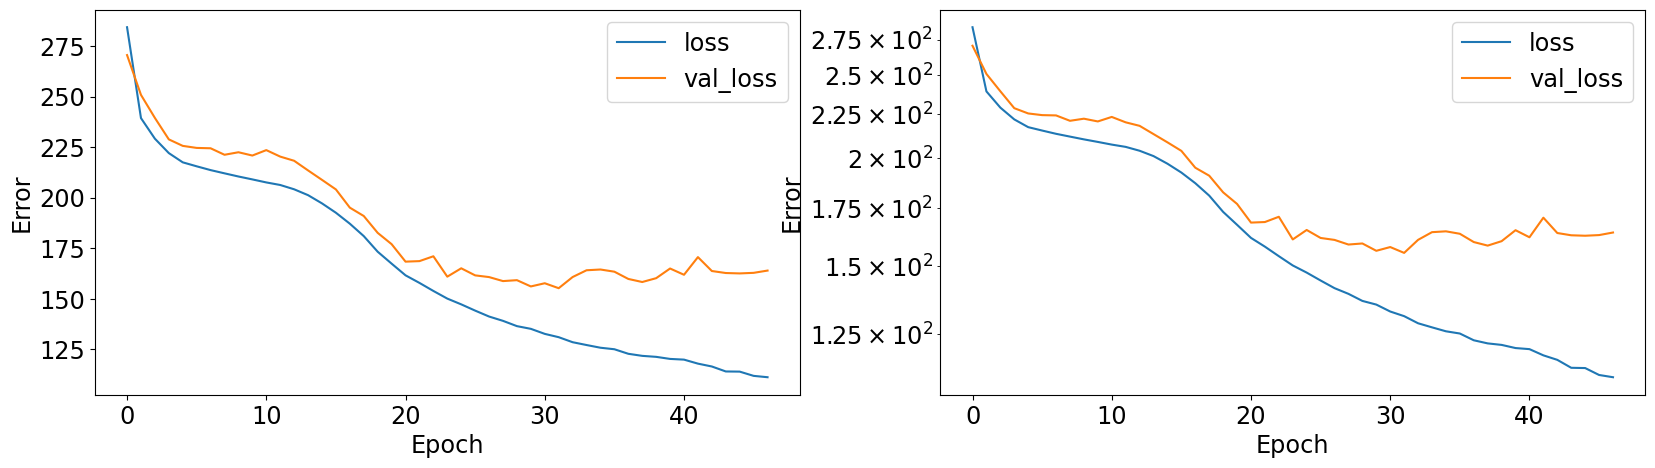

In [19]:
importlib.reload(project);

model_dual = project.trainModel(model_dual, train_data=train_batches, val_data=val_batches, nEpochs=300);

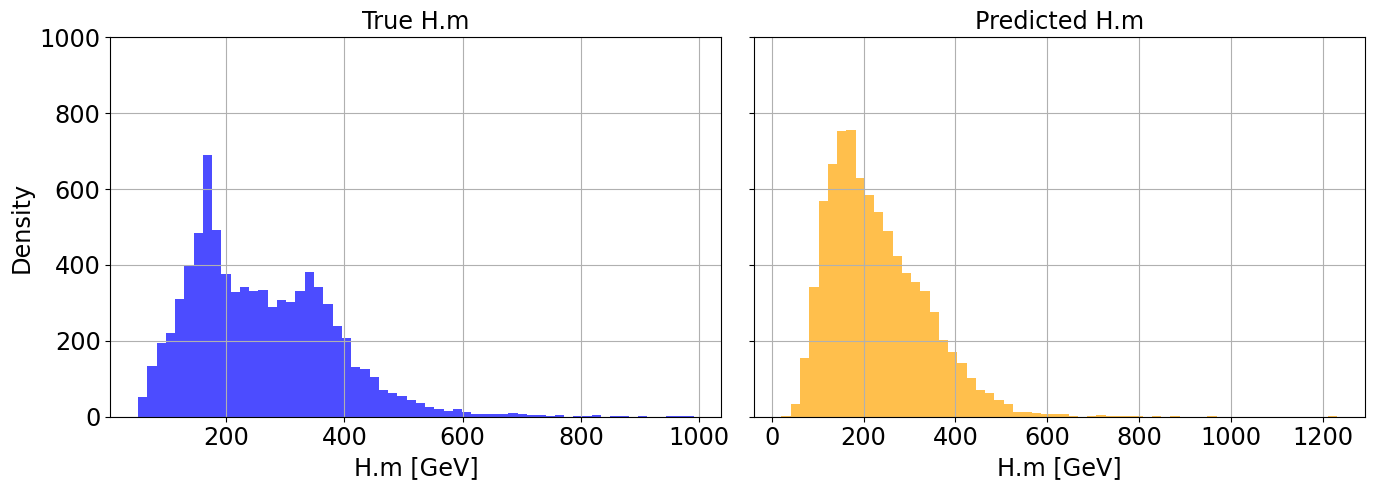

In [20]:
project.plot_H_mass(model_dual, val_batches)

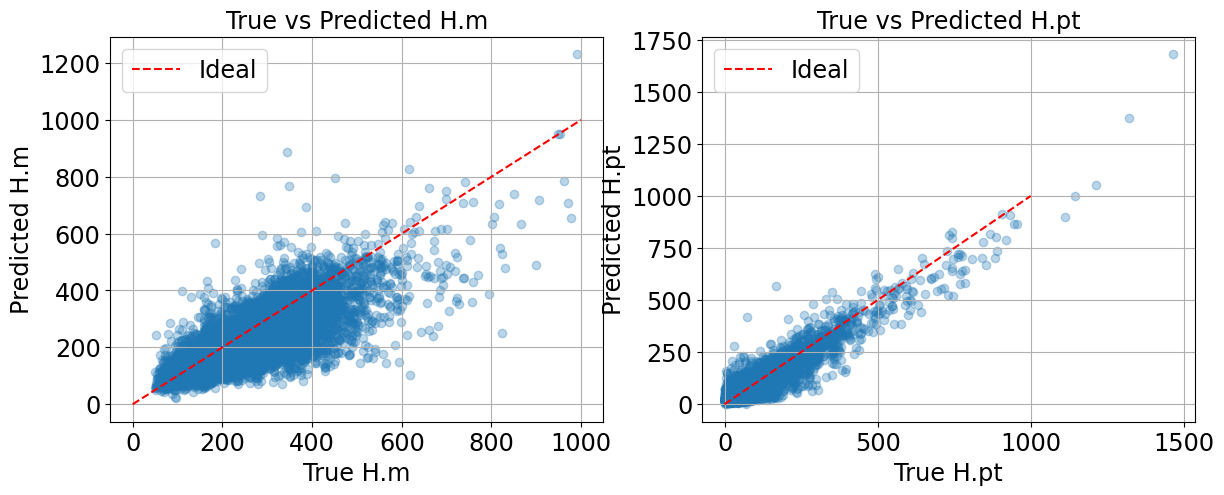

In [21]:
project.true_vs_predict_H_mass(model_dual, val_batches)

Plotting histograms for outputs:  [88.58424, 140.41, 152.74815, 116.383224, 124.49894, 136.0301, 130.6931, 140.23688, 134.29118, 137.01266, 137.11102, 123.8691, 130.94827, 106.76317, 136.9654, 158.05405, 131.56143, 157.98898, 122.348175, 138.2857, 139.19063, 152.0314, 138.5107, 136.911, 138.19885, 122.38176, 131.6518, 140.47098, 125.288765, 98.360275, 95.51653, 127.11733, 156.13031, 140.53131, 140.72142, 145.69844, 147.94067, 160.46576, 137.93562, 146.18091, 135.2802, 125.201904, 125.609924, 114.480156, 124.37775, 135.51831, 132.5641, 117.664314, 127.64578, 202.3477, 145.84026, 141.97975, 104.08829, 153.68721, 134.88878, 140.89185, 128.95393, 128.82051, 132.36978, 136.78113, 144.60812, 134.2929, 136.66592, 113.240814, 302.28903, 253.00822, 173.99756, 277.16144, 482.64096, 371.8988, 420.76126, 279.5352, 293.5375, 344.25995, 278.35092, 930.2468, 454.6738, 255.68544, 227.75131, 216.29378, 433.2892, 315.32523, 421.32303, 412.98212, 206.04533, 366.68866, 267.2862, 556.47784, 350.772, 219.64

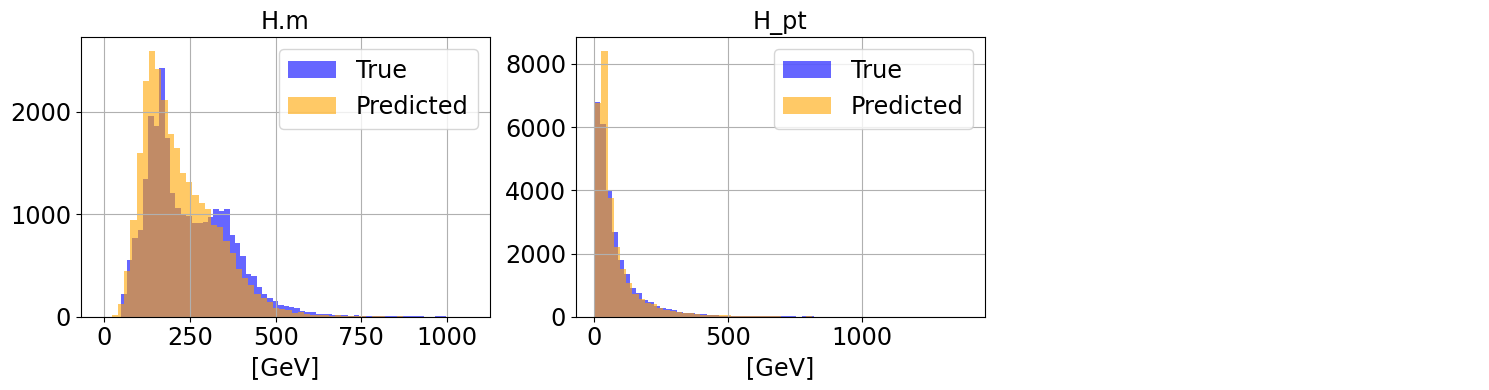

In [22]:
project.plot_all_labels(model_dual, train_batches, output_targets)

## Model architektury trójgałęziowej

In [23]:
dataset_train_test = dataset_train.unbatch()
dataset_split2 = dataset_train_test.map(project.split_inputs2).batch(batchSize).cache()

total_dataset = dataset_split2.shuffle(buffor_size).cache()
val_batches = total_dataset.take(128)
train_batches = total_dataset.skip(128)

In [24]:
input_particles1 = tf.keras.Input(shape=(5,), name="particles_input1")
input_particles2 = tf.keras.Input(shape=(5,), name="particles_input2")
input_met = tf.keras.Input(shape=(5,), name="met_input")

# Gałąź cząstek - 1
norm_particles1 = tf.keras.layers.Normalization()(input_particles1)
x1 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_particles1)
x1 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)
x1 = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)

# Gałąź cząstek - 2
norm_particles2 = tf.keras.layers.Normalization()(input_particles2)
x2 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_particles2)
x2 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)
x2 = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)


#Połączona gałąź cząstek
x12 = tf.keras.layers.concatenate([x1, x2])
x12 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x12)
x12 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x12)

# Gałąź MET
norm_met = tf.keras.layers.Normalization()(input_met)
x3 = tf.keras.layers.Dense(32, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_met)
x3 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x3)
x3 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x3)

# Połączenie
x = tf.keras.layers.concatenate([x12, x3])
x = tf.keras.layers.Dense(512, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
output = tf.keras.layers.Dense(output_shape, activation='linear', name='output')(x)

model_dual2 = tf.keras.Model(inputs={'particles_input1': input_particles1, 'particles_input2': input_particles2, 'met_input': input_met}, outputs=output)

model_dual2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ particles_input1    │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ particles_input2    │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 5)         │         11 │ particles_input1… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 5)         │         11 │ particles_input2… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │        384 │ normalization_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 64)        │        384 │ normalization_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128)       │      8,320 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 128)       │      8,320 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ met_input           │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 256)       │     33,024 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 256)       │     33,024 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 5)         │         11 │ met_input[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 512)       │          0 │ dense_19[0][0],   │
│ (Concatenate)       │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 32)        │        192 │ normalization_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 128)       │     65,664 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 64)        │      2,112 │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 64)        │      8,256 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 128)       │      8,320 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 192)       │          0 │ dense_24[0][0],   │
│ (Concatenate)       │                   │            │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 512)       │     98,816 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 256)       │    131,328 │ dense_28[0][0]  

 Total params: 439,459 (1.68 MB)

 Trainable params: 439,426 (1.68 MB)

 Non-trainable params: 33 (144.00 B)

Epoch 1/300


E0000 00:00:1749557256.959371 16816651 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


428/428 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.8562 - loss: 406.5614 - val_accuracy: 0.9283 - val_loss: 242.1951
Epoch 2/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9235 - loss: 243.8197 - val_accuracy: 0.9277 - val_loss: 234.5225
Epoch 3/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9240 - loss: 231.2852 - val_accuracy: 0.9304 - val_loss: 219.3472
Epoch 4/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9246 - loss: 222.1693 - val_accuracy: 0.9299 - val_loss: 220.0531
Epoch 5/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9246 - loss: 218.2058 - val_accuracy: 0.9305 - val_loss: 216.4072
Epoch 6/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9257 - loss: 214.6948 - val_accuracy: 0.9310 - val_loss: 214.2725
Epoch 7/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9258 - loss: 212.6685 - val_accuracy: 0.9319 - val_loss: 213.0316
Epoch 8/300
428/428 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 

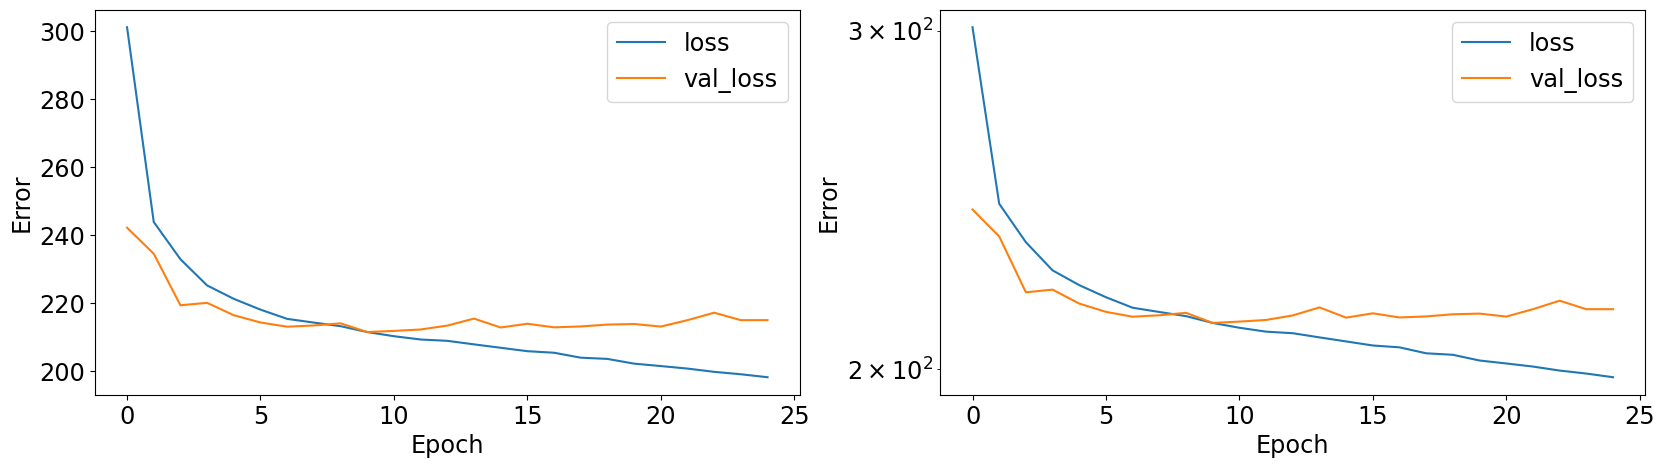

In [25]:
importlib.reload(project);

model_dual2 = project.trainModel(model_dual2, train_data=train_batches, val_data=val_batches, nEpochs=300);

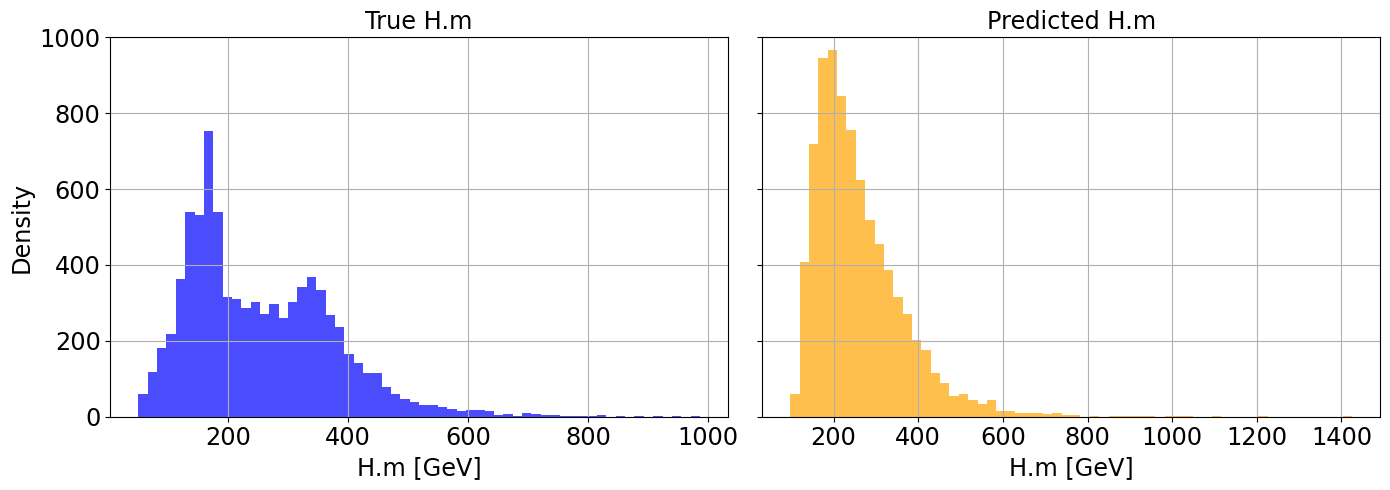

In [26]:
importlib.reload(project);

project.plot_H_mass(model_dual2, val_batches)

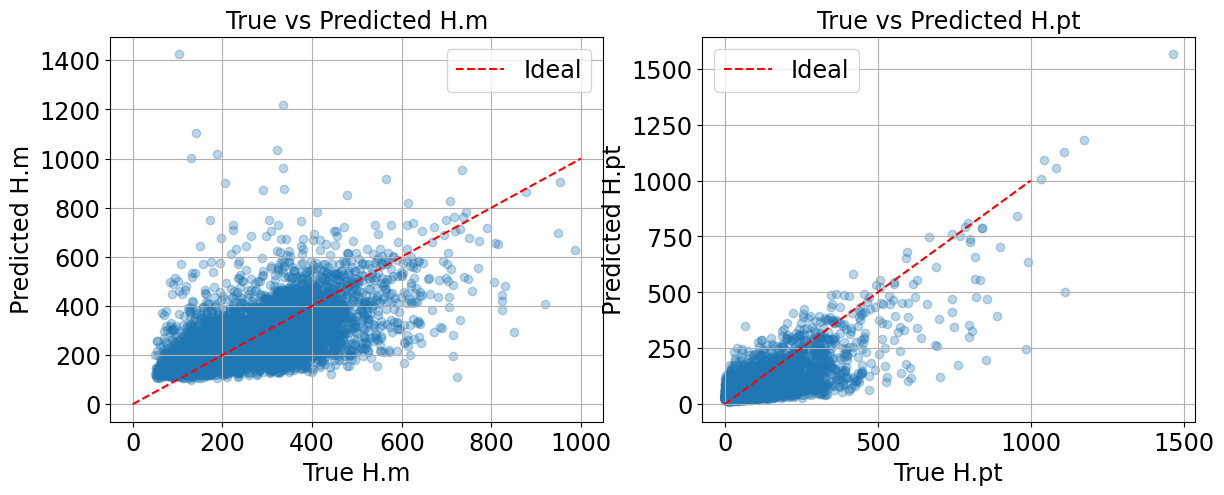

In [27]:
project.true_vs_predict_H_mass(model_dual2, val_batches)

Plotting histograms for outputs:  437.30957 528.6253


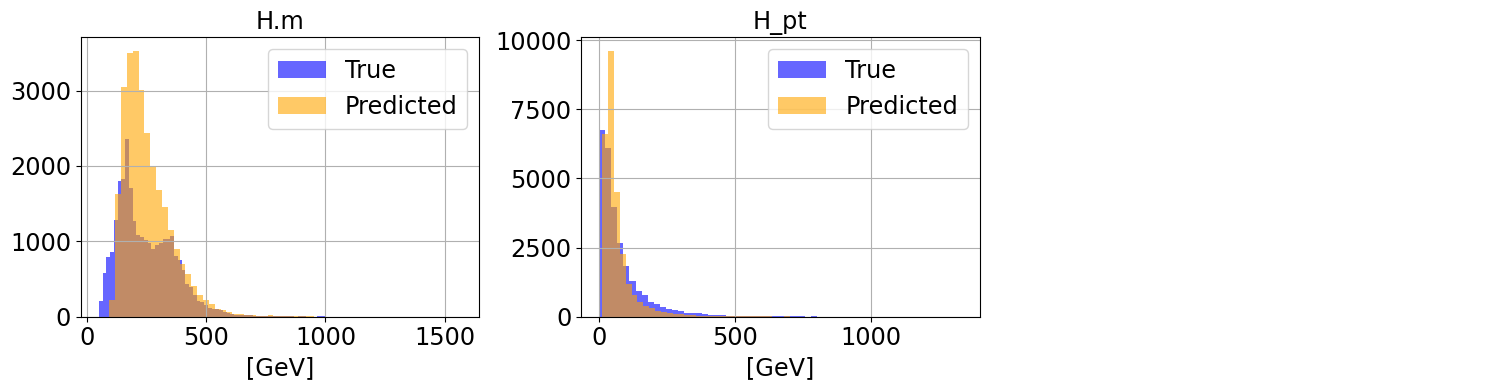

In [28]:
project.plot_all_labels(model_dual2, train_batches, output_targets)